In [1]:
import ROOT
import my_library.common_analysis_tools as tools
# import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import my_library.gluex_style as gxs 
import os
# import numpy as np

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
os.nice(18)

18

## Recon $f_1$, $K_s$, $-t$

In [3]:
hist_file_pipkmks = ROOT.TFile.Open("/work/halld/home/viducic/scripts/plotting/thesis_pipkmks_fall_mc_hists.root", "READ")


In [4]:
hist_pipkmks = hist_file_pipkmks.Get('pipkmks')
hist_t = hist_file_pipkmks.Get('mand_t')
hist_ks = hist_file_pipkmks.Get('ks_m')

In [5]:
c = ROOT.TCanvas('c', 'c', 800, 800)

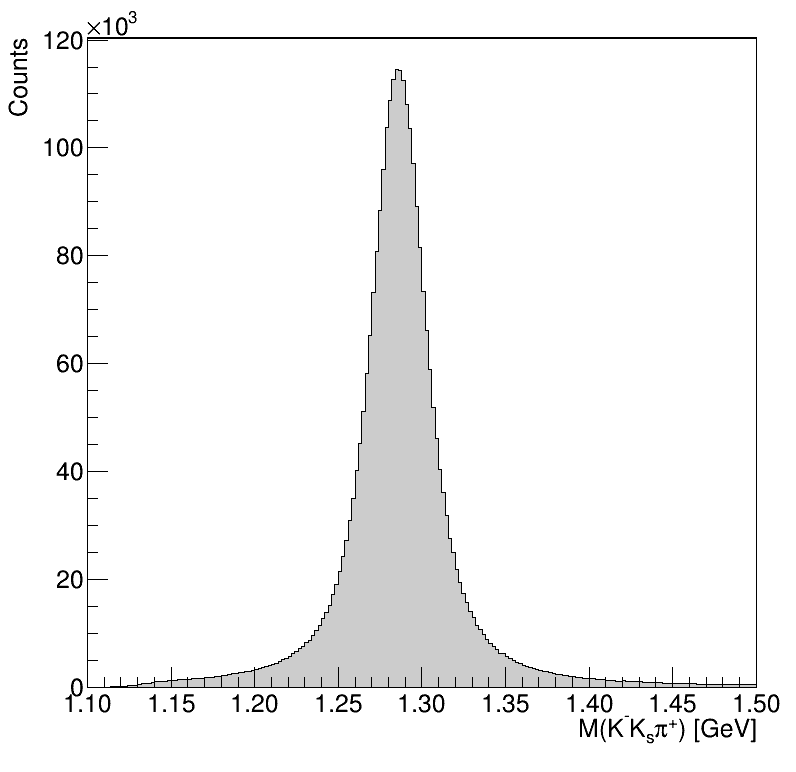

In [6]:
c.Clear()

hist_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_pipkmks.GetYaxis().SetTitle('Counts')
hist_pipkmks.SetFillColor(ROOT.kGray)
hist_pipkmks.SetLineColor(ROOT.kBlack)

hist_pipkmks.Draw()
c.Draw()

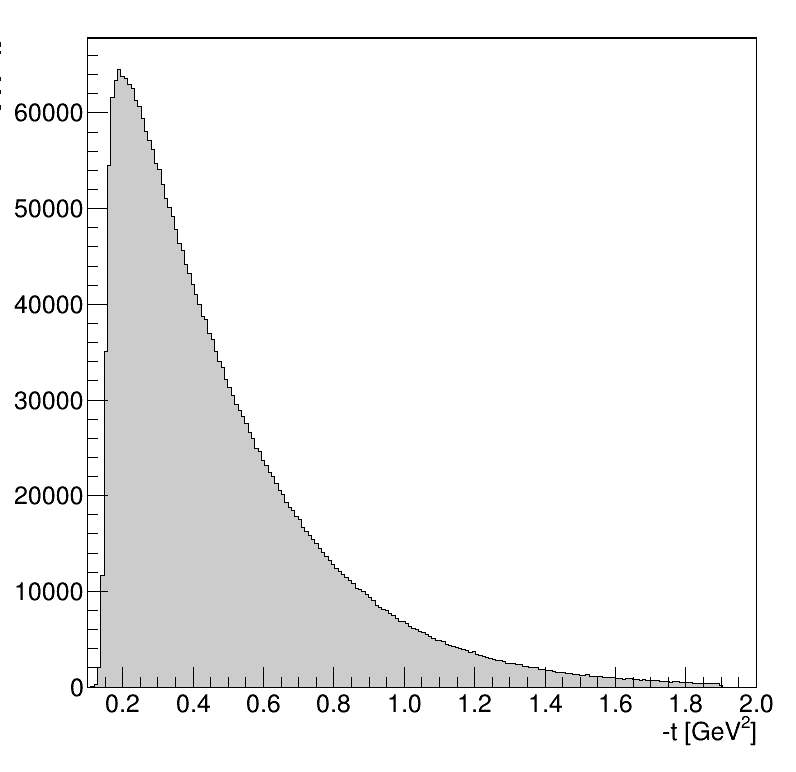

In [7]:
c.Clear()

hist_t.GetXaxis().SetTitle('-t [GeV^{2}]')
hist_t.GetYaxis().SetTitle('Counts')
hist_t.SetFillColor(ROOT.kGray)
hist_t.SetLineColor(ROOT.kBlack)

hist_t.Draw()
c.Draw()

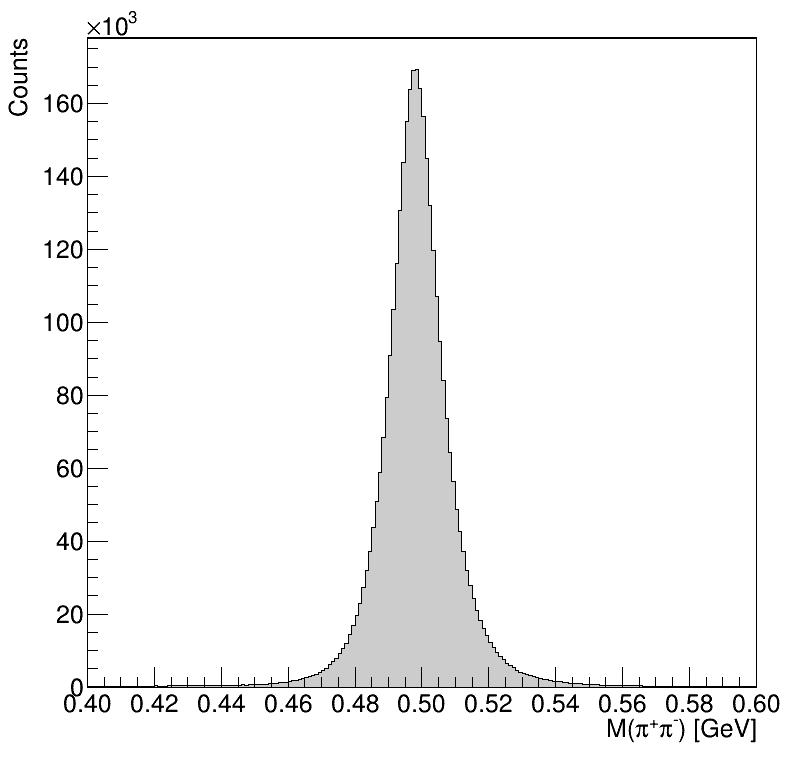

In [8]:
c.Clear()

hist_ks.GetXaxis().SetTitle('M(#pi^{+}#pi^{-}) [GeV]')
hist_ks.GetYaxis().SetTitle('Counts')
hist_ks.SetFillColor(ROOT.kGray)
hist_ks.SetLineColor(ROOT.kBlack)

hist_ks.Draw()
c.Draw()

## Kinematic Comparisons

In [9]:
kin_data_pipkmks_file = ROOT.TFile.Open('/work/halld/home/viducic/scripts/plotting/pipkmks_data_kinematic_hists.root', 'READ')
kin_signal_pipkmks_file = ROOT.TFile.Open('/work/halld/home/viducic/scripts/plotting/pipkmks_signal_kinematic_hists.root', 'READ')
kin_data_pimkpks_file = ROOT.TFile.Open('/work/halld/home/viducic/scripts/plotting/pimkpks_data_kinematic_hists.root', 'READ')
kin_signal_pimkpks_file = ROOT.TFile.Open('/work/halld/home/viducic/scripts/plotting/pimkpks_signal_kinematic_hists.root', 'READ')

## Proton

In [10]:
p_px_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_proton_px_data')
p_px_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_proton_px_signal')
p_px_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_proton_px_data')
p_px_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_proton_px_signal')

p_py_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_proton_py_data')
p_py_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_proton_py_signal')
p_py_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_proton_py_data')
p_py_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_proton_py_signal')

p_pz_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_proton_pz_data')
p_pz_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_proton_pz_signal')
p_pz_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_proton_pz_data')
p_pz_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_proton_pz_signal')

p_p_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_proton_p_data')
p_p_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_proton_p_signal')
p_p_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_proton_p_data')
p_p_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_proton_p_signal')

p_theta_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_proton_theta_data')
p_theta_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_proton_theta_signal')
p_theta_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_proton_theta_data')
p_theta_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_proton_theta_signal')

p_phi_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_proton_phi_data')
p_phi_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_proton_phi_signal')
p_phi_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_proton_phi_data')
p_phi_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_proton_phi_signal')

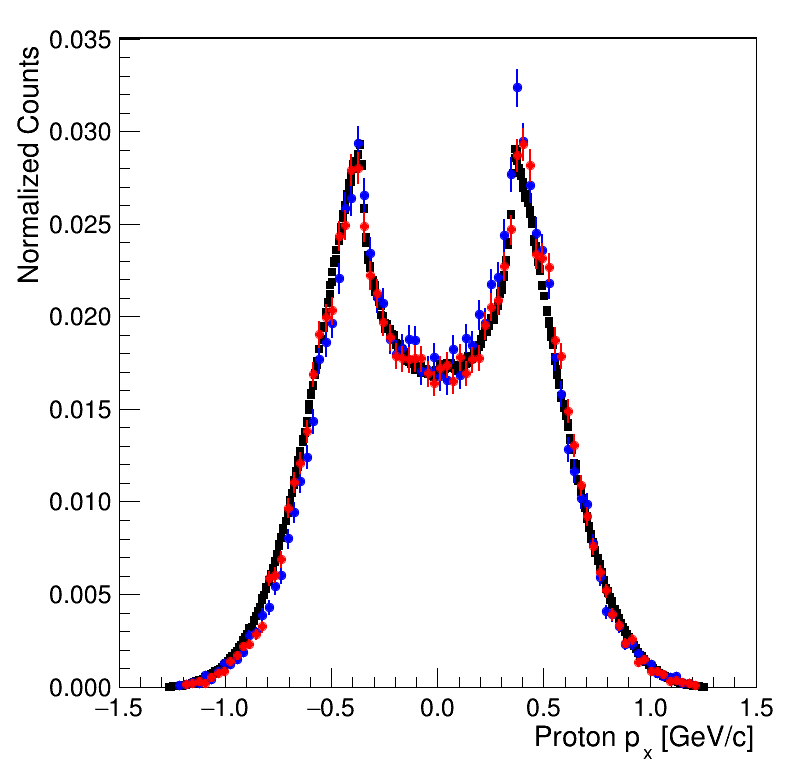

In [11]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
p_px_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
p_px_hist_data_pipkmks.Draw()
p_px_hist_signal_pipkmks.Draw("same")
p_px_hist_signal_pimkpks.Draw("same")
p_px_hist_data_pipkmks.Draw("same")
p_px_hist_data_pimkpks.Draw("same")
c.Draw()


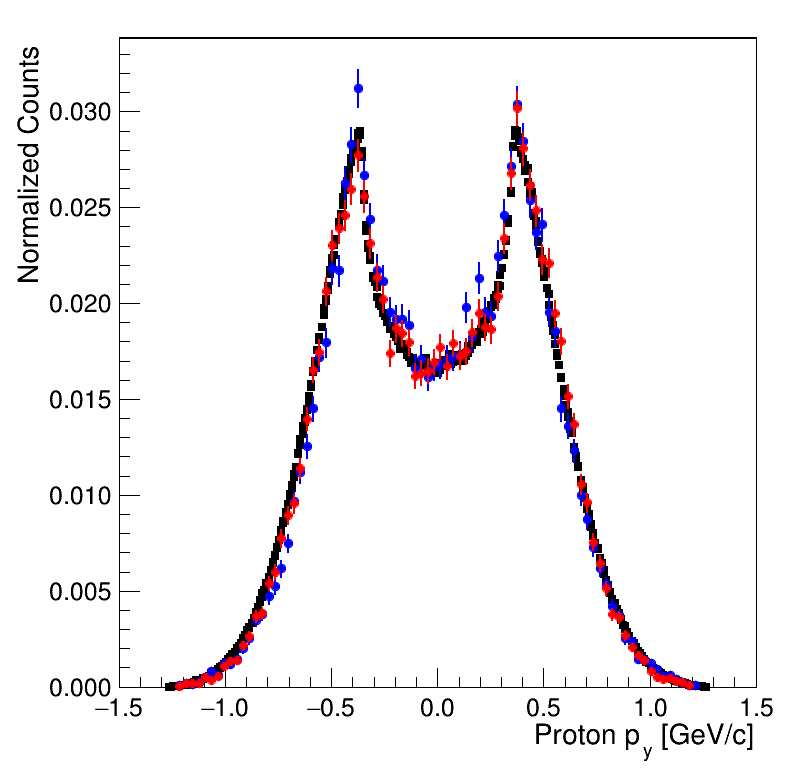

In [12]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
p_py_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
p_py_hist_data_pipkmks.Draw()
p_py_hist_signal_pipkmks.Draw("same")
p_py_hist_signal_pimkpks.Draw("same")
p_py_hist_data_pipkmks.Draw("same")
p_py_hist_data_pimkpks.Draw("same")
c.Draw()

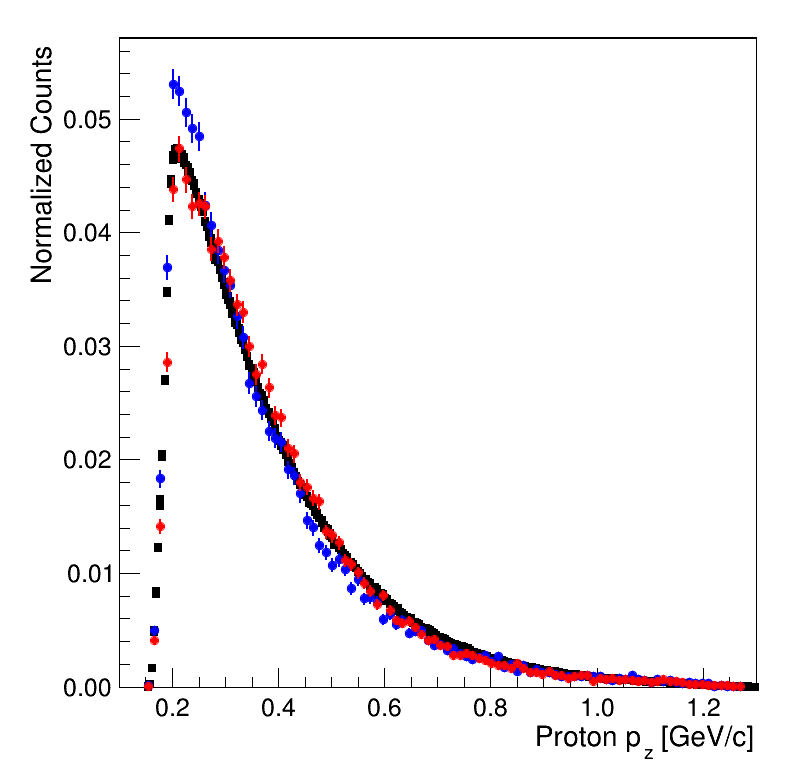

In [13]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
p_pz_hist_data_pipkmks.Draw()
p_pz_hist_signal_pipkmks.Draw("same")
p_pz_hist_signal_pimkpks.Draw("same")
p_pz_hist_data_pipkmks.Draw("same")
p_pz_hist_data_pimkpks.Draw("same")
c.Draw()

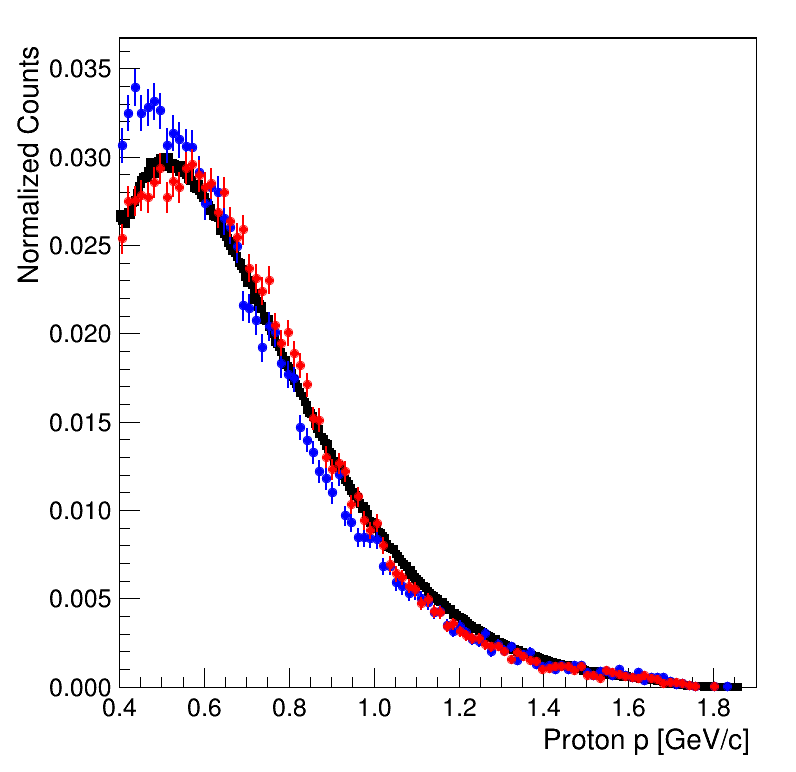

In [14]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
p_p_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
p_p_hist_data_pipkmks.Draw()
p_p_hist_signal_pipkmks.Draw("same")
p_p_hist_signal_pimkpks.Draw("same")
p_p_hist_data_pipkmks.Draw("same")
p_p_hist_data_pimkpks.Draw("same")
c.Draw()

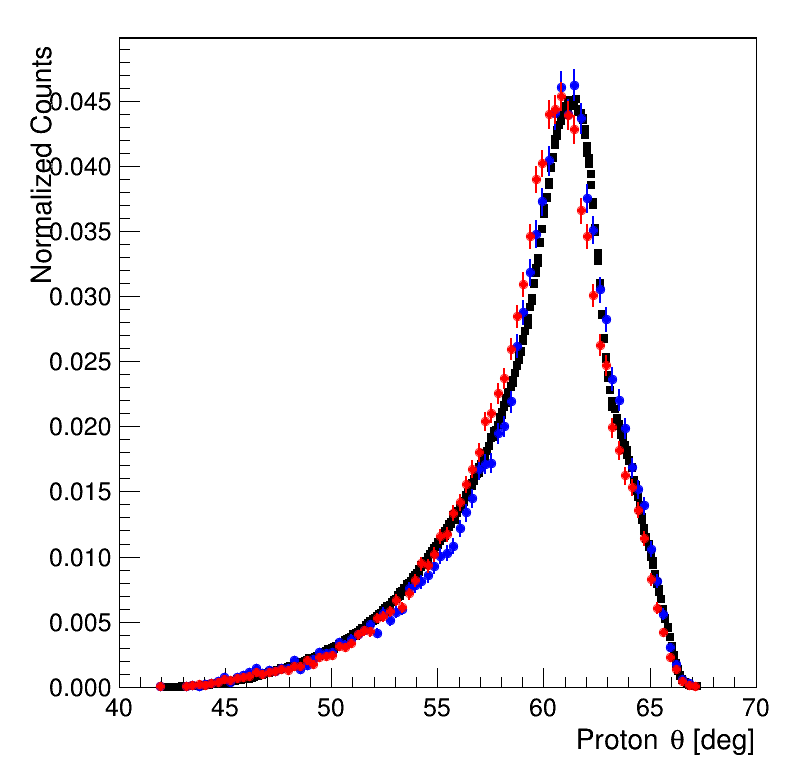

In [15]:
c.Clear()
p_theta_hist_data_pipkmks.Draw()
p_theta_hist_signal_pipkmks.Draw("same")
p_theta_hist_signal_pimkpks.Draw("same")
p_theta_hist_data_pipkmks.Draw("same")
p_theta_hist_data_pimkpks.Draw("same")
c.Draw()

## Pion

In [16]:
pion_px_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_pion_px_data')
pion_px_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_pion_px_signal')
pion_px_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_pion_px_data')
pion_px_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_pion_px_signal')

pion_py_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_pion_py_data')
pion_py_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_pion_py_signal')
pion_py_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_pion_py_data')
pion_py_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_pion_py_signal')

pion_pz_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_pion_pz_data')
pion_pz_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_pion_pz_signal')
pion_pz_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_pion_pz_data')
pion_pz_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_pion_pz_signal')

pion_p_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_pion_p_data')
pion_p_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_pion_p_signal')
pion_p_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_pion_p_data')
pion_p_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_pion_p_signal')

pion_theta_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_pion_theta_data')
pion_theta_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_pion_theta_signal')
pion_theta_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_pion_theta_data')
pion_theta_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_pion_theta_signal')

pion_phi_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_pion_phi_data')
pion_phi_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_pion_phi_signal')
pion_phi_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_pion_phi_data')
pion_phi_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_pion_phi_signal')

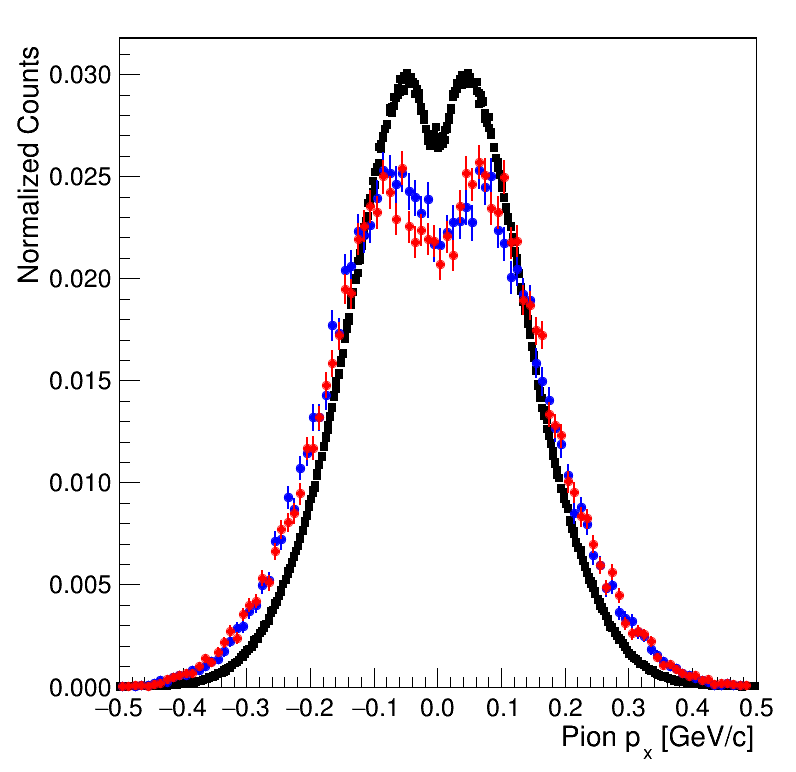

In [17]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pion_px_hist_signal_pipkmks.GetYaxis().SetTitleOffset(1.8)
pion_px_hist_signal_pipkmks.Draw()
pion_px_hist_data_pipkmks.Draw("same")
pion_px_hist_signal_pimkpks.Draw("same")
pion_px_hist_data_pipkmks.Draw("same")
pion_px_hist_data_pimkpks.Draw("same")
c.Draw()


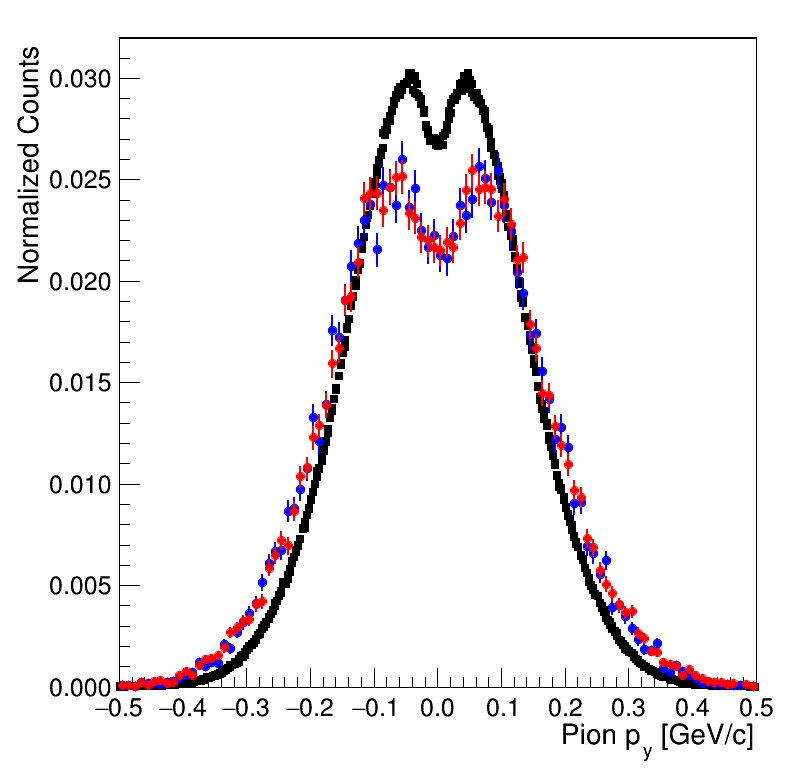

In [18]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pion_py_hist_signal_pipkmks.GetYaxis().SetTitleOffset(1.8)
pion_py_hist_signal_pipkmks.Draw()
pion_py_hist_data_pipkmks.Draw("same")
pion_py_hist_signal_pimkpks.Draw("same")
pion_py_hist_data_pipkmks.Draw("same")
pion_py_hist_data_pimkpks.Draw("same")
c.Draw()

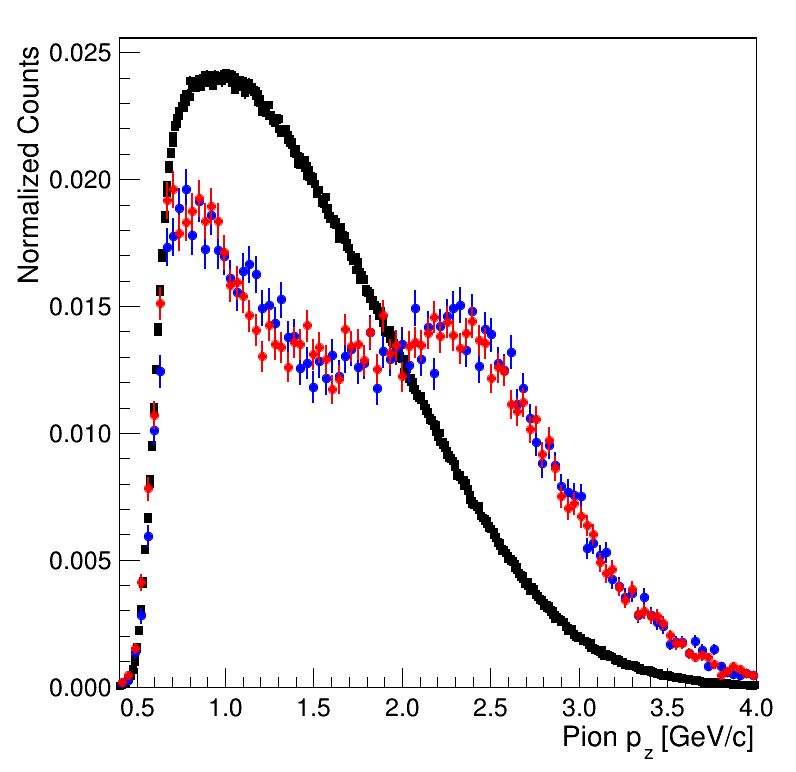

In [19]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pion_pz_hist_signal_pipkmks.GetYaxis().SetTitleOffset(1.8)
pion_pz_hist_signal_pipkmks.Draw()
pion_pz_hist_data_pipkmks.Draw("same")
pion_pz_hist_signal_pimkpks.Draw("same")
pion_pz_hist_data_pipkmks.Draw("same")
pion_pz_hist_data_pimkpks.Draw("same")
c.Draw()

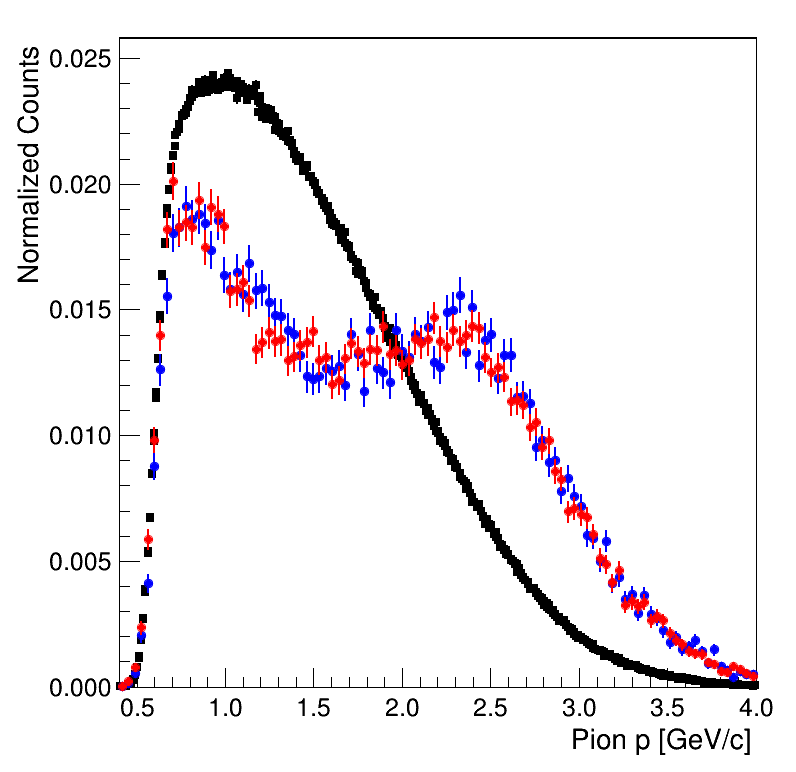

In [20]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pion_p_hist_signal_pipkmks.GetYaxis().SetTitleOffset(1.8)
pion_p_hist_signal_pipkmks.Draw()
pion_p_hist_data_pipkmks.Draw("same")
pion_p_hist_signal_pimkpks.Draw("same")
pion_p_hist_data_pipkmks.Draw("same")
pion_p_hist_data_pimkpks.Draw("same")
c.Draw()

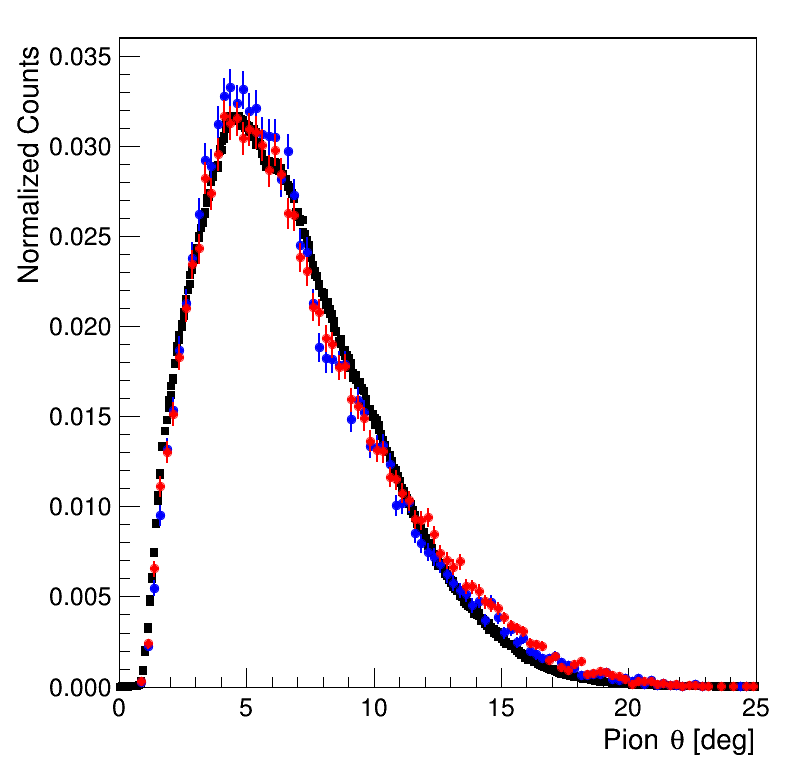

In [21]:
c.Clear()
pion_theta_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
pion_theta_hist_data_pipkmks.Draw()
pion_theta_hist_signal_pipkmks.Draw("same")
pion_theta_hist_signal_pimkpks.Draw("same")
pion_theta_hist_data_pipkmks.Draw("same")
pion_theta_hist_data_pimkpks.Draw("same")
c.Draw()

## Kaon

In [22]:
kaon_px_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_kaon_px_data')
kaon_px_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_kaon_px_signal')
kaon_px_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_kaon_px_data')
kaon_px_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_kaon_px_signal')

kaon_py_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_kaon_py_data')
kaon_py_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_kaon_py_signal')
kaon_py_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_kaon_py_data')
kaon_py_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_kaon_py_signal')

kaon_pz_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_kaon_pz_data')
kaon_pz_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_kaon_pz_signal')
kaon_pz_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_kaon_pz_data')
kaon_pz_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_kaon_pz_signal')

kaon_p_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_kaon_p_data')
kaon_p_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_kaon_p_signal')
kaon_p_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_kaon_p_data')
kaon_p_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_kaon_p_signal')

kaon_theta_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_kaon_theta_data')
kaon_theta_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_kaon_theta_signal')
kaon_theta_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_kaon_theta_data')
kaon_theta_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_kaon_theta_signal')

kaon_phi_hist_data_pipkmks = kin_data_pipkmks_file.Get('pipkmks_kaon_phi_data')
kaon_phi_hist_signal_pipkmks = kin_signal_pipkmks_file.Get('pipkmks_kaon_phi_signal')
kaon_phi_hist_data_pimkpks = kin_data_pimkpks_file.Get('pimkpks_kaon_phi_data')
kaon_phi_hist_signal_pimkpks = kin_signal_pimkpks_file.Get('pimkpks_kaon_phi_signal')

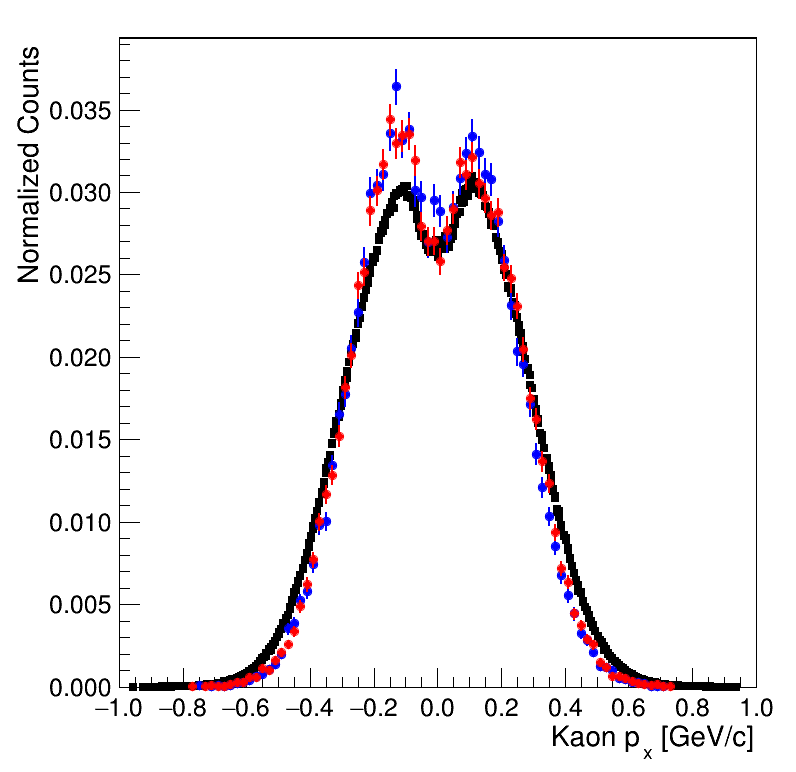

In [23]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
kaon_px_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
kaon_px_hist_data_pipkmks.Draw()
kaon_px_hist_signal_pipkmks.Draw("same")
kaon_px_hist_signal_pimkpks.Draw("same")
kaon_px_hist_data_pipkmks.Draw("same")
kaon_px_hist_data_pimkpks.Draw("same")
c.Draw()


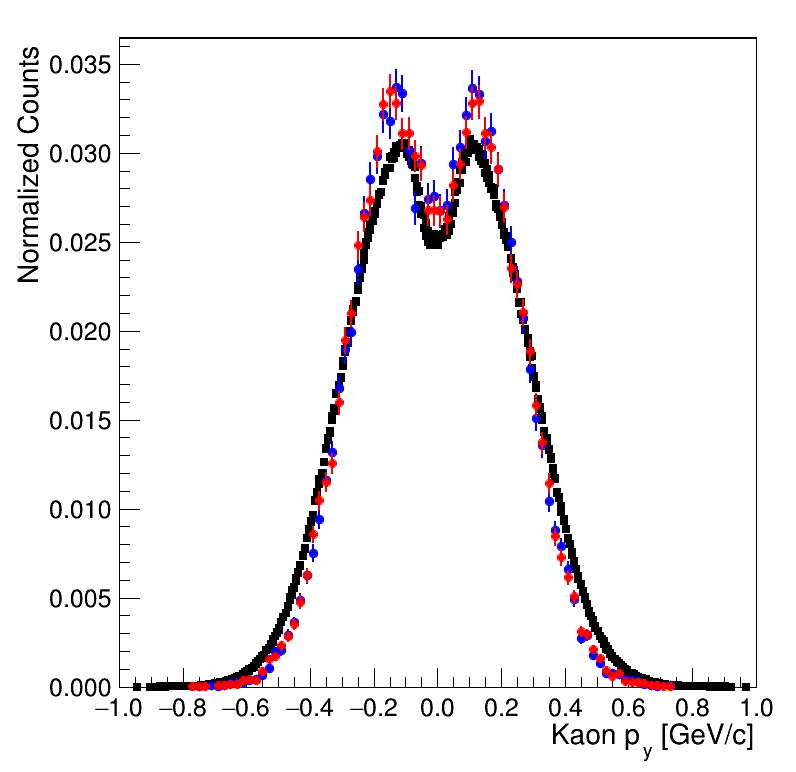

In [24]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
kaon_py_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
kaon_py_hist_data_pipkmks.Draw()
kaon_py_hist_signal_pipkmks.Draw("same")
kaon_py_hist_signal_pimkpks.Draw("same")
kaon_py_hist_data_pipkmks.Draw("same")
kaon_py_hist_data_pimkpks.Draw("same")
c.Draw()

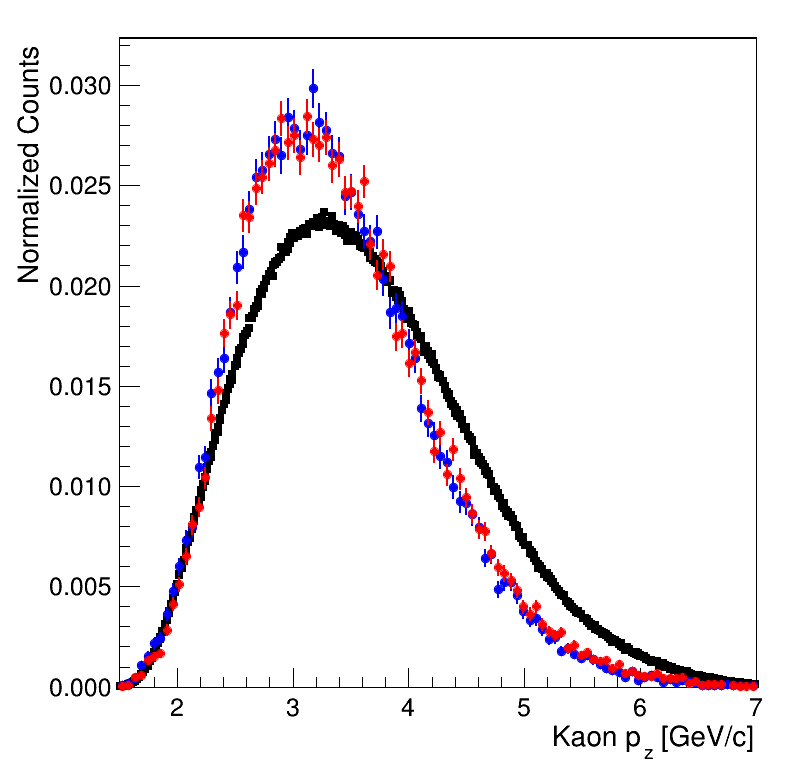

In [25]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
kaon_pz_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
kaon_pz_hist_data_pipkmks.Draw()
kaon_pz_hist_signal_pipkmks.Draw("same")
kaon_pz_hist_signal_pimkpks.Draw("same")
kaon_pz_hist_data_pipkmks.Draw("same")
kaon_pz_hist_data_pimkpks.Draw("same")
c.Draw()

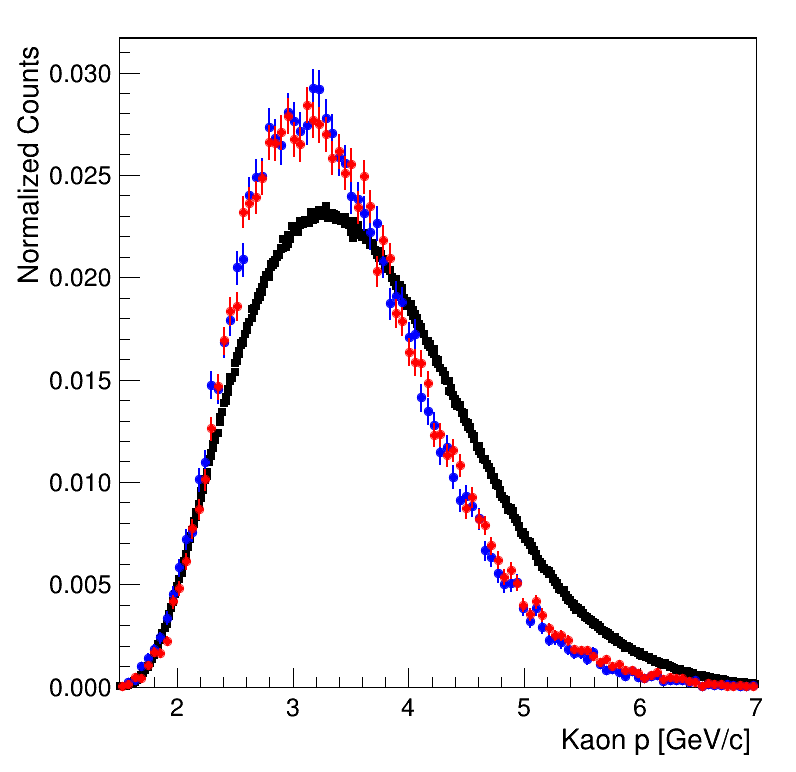

In [26]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
kaon_p_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
kaon_p_hist_data_pipkmks.Draw()
kaon_p_hist_signal_pipkmks.Draw("same")
kaon_p_hist_signal_pimkpks.Draw("same")
kaon_p_hist_data_pipkmks.Draw("same")
kaon_p_hist_data_pimkpks.Draw("same")
c.Draw()

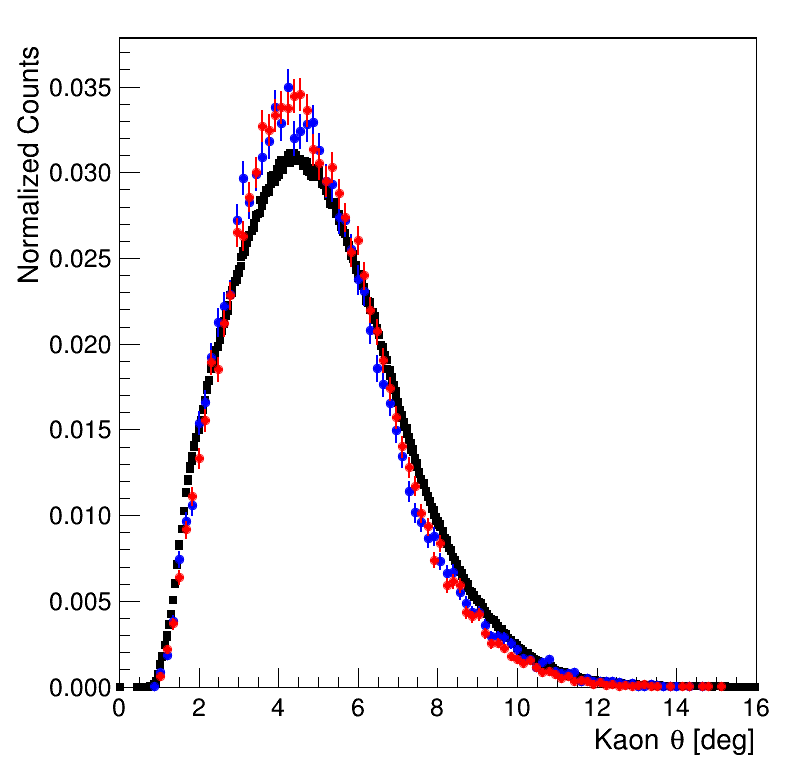

In [27]:
c.Clear()
kaon_theta_hist_data_pipkmks.GetYaxis().SetTitleOffset(1.8)
kaon_theta_hist_data_pipkmks.Draw()
kaon_theta_hist_signal_pipkmks.Draw("same")
kaon_theta_hist_signal_pimkpks.Draw("same")
kaon_theta_hist_data_pipkmks.Draw("same")
kaon_theta_hist_data_pimkpks.Draw("same")
c.Draw()

## Acceptance vs $p_z(\pi)$ and $p_z(K)$

In [28]:
signal_region = kcuts.F1_SIGNAL_REGION_PIPKMKS
df_recon = tools.get_dataframe('pipkmks', 'fall', 'signal').Filter(signal_region).Filter(kcuts.BEAM_RANGE).Filter(kcuts.T_RANGE)
df_thrown = tools.get_dataframe('pipkmks', 'fall', 'signal', filtered=False, thrown=True).Filter(signal_region).Filter(kcuts.BEAM_RANGE).Filter(kcuts.T_RANGE)

In [51]:
hist_pion_pz_recon = df_recon.Histo1D(('pion_pz_recon', 'pion_pz_recon', 100, 0.6, 3.5), 'pip1_pz')
hist_pion_pz_thrown = df_thrown.Histo1D(('pion_pz_thrown', 'pion_pz_thrown', 100, 0.6, 3.5), 'PiPlus1_pz')
hist_kaon_pz_recon = df_recon.Histo1D(('kaon_pz_recon', 'kaon_pz_recon', 150, 1.7, 5.0), 'km_pz')
hist_kaon_pz_thrown = df_thrown.Histo1D(('kaon_pz_thrown', 'pkaonpz_thrown', 150, 1.7, 5.0), 'KMinus_pz')

hist_pion_pz_recon.Sumw2()
hist_pion_pz_thrown.Sumw2()
hist_kaon_pz_recon.Sumw2()
hist_kaon_pz_thrown.Sumw2()



In [52]:
acceptance_pion = hist_pion_pz_recon.Clone('acceptance_pion')
acceptance_pion.Divide(hist_pion_pz_thrown.GetPtr())
acceptance_kaon = hist_kaon_pz_recon.Clone('acceptance_kaon')
acceptance_kaon.Divide(hist_kaon_pz_thrown.GetPtr())


True

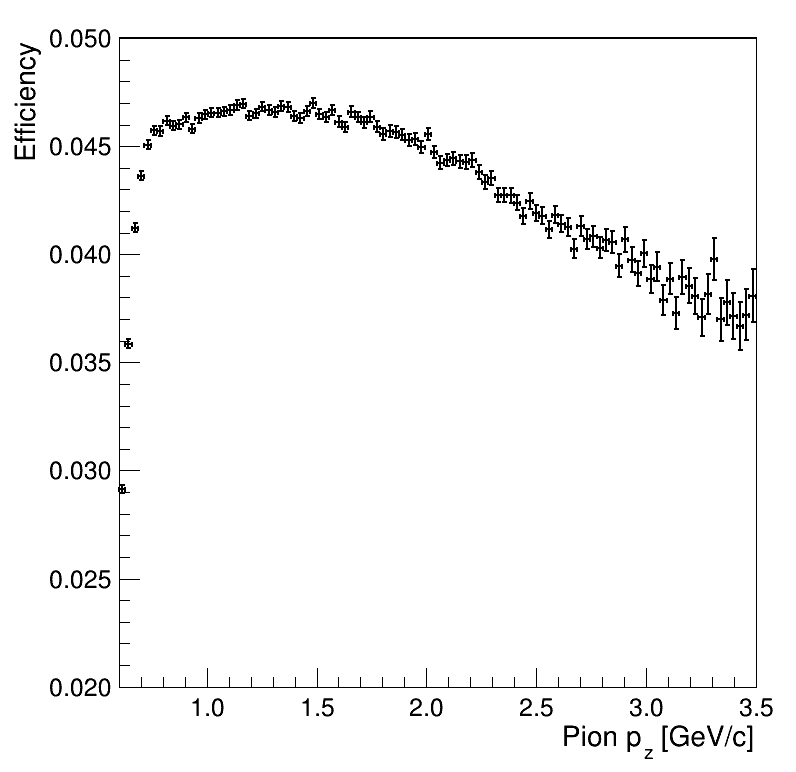

In [53]:
c.Clear()
acceptance_pion.GetYaxis().SetRangeUser(0.02, 0.05)
acceptance_pion.GetYaxis().SetTitle("Efficiency")
acceptance_pion.GetYaxis().SetTitleOffset(1.8)
acceptance_pion.GetXaxis().SetTitle("Pion p_{z} [GeV/c]")
acceptance_pion.Draw("E1")
c.Draw()

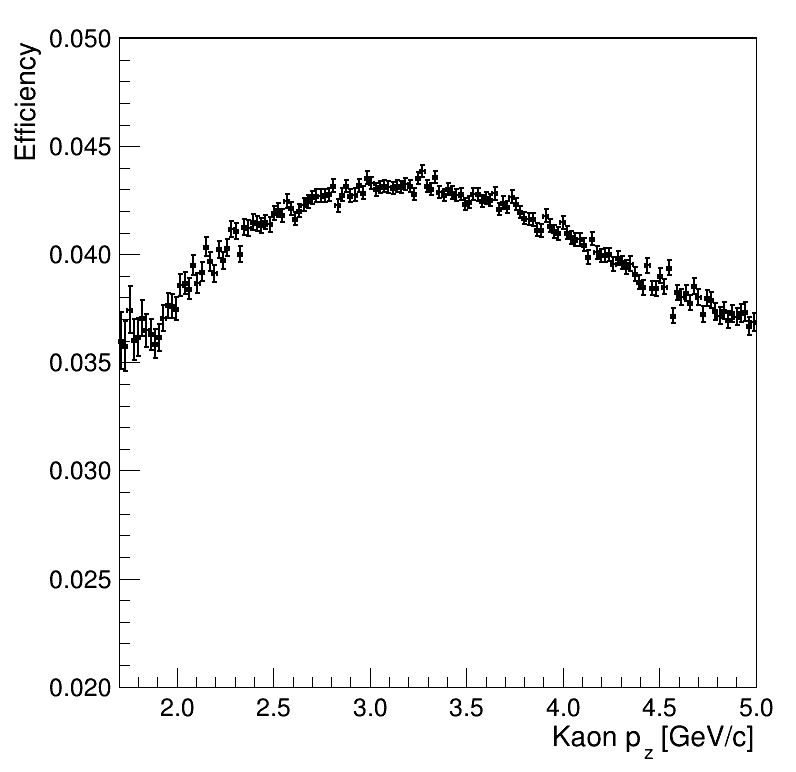

In [54]:
c.Clear()
acceptance_kaon.GetYaxis().SetRangeUser(0.02, 0.05)
acceptance_kaon.GetYaxis().SetTitle("Efficiency")
acceptance_kaon.GetYaxis().SetTitleOffset(1.8)
acceptance_kaon.GetXaxis().SetTitle("Kaon p_{z} [GeV/c]")
acceptance_kaon.Draw("E1")
c.Draw()

In [55]:
# c.Clear()
# acceptance_kaon.GetYaxis().SetRangeUser(0.03, 0.06)
# acceptance_kaon.GetXaxis().SetRangeUser(0.08, 4.0)
# acceptance_kaon.GetYaxis().SetTitle("Efficiency")
# acceptance_kaon.GetYaxis().SetTitleOffset(1.8)
# acceptance_kaon.GetXaxis().SetTitle("Kaon/Pion p_{z} [GeV/c]")
# acceptance_kaon.SetLineColor(ROOT.kBlue)
# acceptance_pion.SetLineColor(ROOT.kRed)
# acceptance_kaon.Draw("E1")
# acceptance_pion.Draw("E1 same")
# c.Draw()